In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error


In [3]:
chemprop_qm9_preds = "../../../../data/benchmarks_qm9/test_preds_qm9.csv"
chemprop_qm8_preds = "../../../../data/benchmarks_qm8/test_preds_qm8.csv"
test_qm9 = "../benchmark_data/qm9_test_chemprop.csv"
test_qm8 = "../benchmark_data/qm8_test_chemprop.csv"
df_qm8_chemprop = pd.read_csv(chemprop_qm8_preds)
df_qm9_chemprop = pd.read_csv(chemprop_qm9_preds)
df_qm8 = pd.read_csv(test_qm8)
df_qm9 = pd.read_csv(test_qm9)


In [4]:
qm8_targets = ["CC2_E1", "CC2_E2"]
qm9_targets = ["homo", "lumo", "gap", "U0"]

df_qm8 = df_qm8[qm8_targets]
df_qm8_chemprop = df_qm8_chemprop[qm8_targets]

df_qm9 = df_qm9[qm9_targets]
df_qm9_chemprop = df_qm9_chemprop[qm9_targets]


In [5]:
# compute mae for each
mae_dict = {}
r2_dict = {}
for key in qm8_targets:
    mae_dict[key] = mean_absolute_error(df_qm8[key], df_qm8_chemprop[key])
    # compute r2
    r2_dict[key] = r2_score(df_qm8[key], df_qm8_chemprop[key])


In [6]:
print(r2_dict)
print(mae_dict)


{'CC2_E1': -0.0490938914144432, 'CC2_E2': -0.033068179304211354}
{'CC2_E1': 0.037292939428446296, 'CC2_E2': 0.02692865299754383}


In [7]:
# compute mae for each
mae_dict = {}
r2_dict = {}
for key in qm9_targets:
    mae_dict[key] = mean_absolute_error(df_qm9[key], df_qm9_chemprop[key])
    # compute r2
    r2_dict[key] = r2_score(df_qm9[key], df_qm9_chemprop[key])


In [8]:
print(r2_dict)
print(mae_dict)


{'homo': 0.9183190678219507, 'lumo': 0.9794884559661198, 'gap': 0.9613143834472638, 'U0': 0.8836015923516866}
{'homo': 0.004512553007996226, 'lumo': 0.004764492685169045, 'gap': 0.006451880373473241, 'U0': 8.047190356907446}


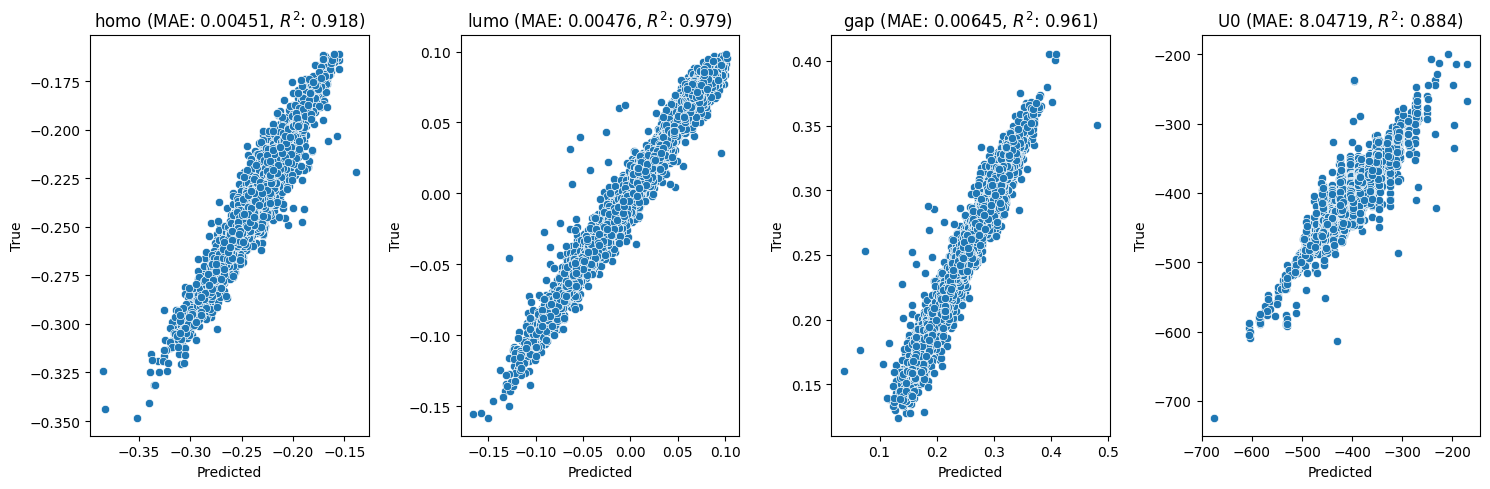

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

name_list = ["homo", "lumo", "gap", "U0"]
df_qm9[key]
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
for i in range(4):
    key = name_list[i]
    sns.scatterplot(x=df_qm9[key], y=df_qm9_chemprop[key], ax=ax[i])
    ax[i].set_title(
        "{} (MAE: {:.5f}, $R^2$: {:.3f})".format(
            key,
            mae_dict[key],
            r2_dict[key],
        )
    )
    ax[i].set_xlabel("Predicted")
    ax[i].set_ylabel("True")
    # ax[i].set_xlim(-10, 10)
    # ax[i].set_ylim(-10, 10)
    # ax[i].plot([-10, 10], [-10, 10], color="black", linestyle="--")
fig.tight_layout()


In [11]:
# learning experiment


In [27]:
res_100 = "../../../../data/benchmarks_qm9/test_preds_qm9_100.csv"
df_test_100 = pd.read_csv(res_100)
res_1000 = "../../../../data/benchmarks_qm9/test_preds_qm9_1000.csv"
df_test_1000 = pd.read_csv(res_1000)
res_10000 = "../../../../data/benchmarks_qm9/test_preds_qm9_10000.csv"
df_test_10000 = pd.read_csv(res_10000)
res_100000 = "../../../../data/benchmarks_qm9/test_preds_qm9_100000.csv"
df_test_100000 = pd.read_csv(res_100000)

df_test_100 = df_test_100[qm9_targets]
df_test_1000 = df_test_1000[qm9_targets]
df_test_10000 = df_test_10000[qm9_targets]
df_test_100000 = df_test_100000[qm9_targets]


In [28]:
for df in [df_test_100, df_test_1000, df_test_10000, df_test_100000]:
    # compute mae for each
    mae_dict = {}
    r2_dict = {}
    mae_list = []
    r2_list = []

    for key in qm9_targets:
        r2 = r2_score(df_qm9[key], df[key])
        mae = mean_absolute_error(df_qm9[key], df[key])

        mae_dict[key] = mae
        r2_dict[key] = r2
        mae_list.append(mae)
        r2_list.append(r2)
    print(np.mean(r2_list), mae_dict)
    # print(mae_dict)


0.13532272499231524 {'homo': 0.01579321346408825, 'lumo': 0.03498939114382689, 'gap': 0.03338194936065643, 'U0': 29.351923978855048}
0.8100815998071682 {'homo': 0.0072345536628107944, 'lumo': 0.008657986605628134, 'gap': 0.011114513223251382, 'U0': 17.76564294318807}
0.9356808748967552 {'homo': 0.004512553007996226, 'lumo': 0.004764492685169045, 'gap': 0.006451880373473241, 'U0': 8.047190356907446}
0.9827926116058239 {'homo': 0.002794791452295191, 'lumo': 0.0031316146790206167, 'gap': 0.0038889527784236122, 'U0': 1.4765014085297063}


# this is the big/small experiment

In [4]:
# generalization experiment

chemprop_qm9_preds = "../benchmark_data/chemprop_test_preps_size_generalization.csv"
test_qm9 = "../benchmark_data/qm9_test_large.csv"
df_qm9_chemprop = pd.read_csv(chemprop_qm9_preds)
df_qm9 = pd.read_csv(test_qm9)


In [5]:
qm9_targets = ["homo", "lumo", "gap", "U0"]

# compute mae for each
mae_dict = {}
r2_dict = {}
mae_list = []
r2_list = []

for key in qm9_targets:
    r2 = r2_score(df_qm9[key], df_qm9_chemprop[key])
    mae = mean_absolute_error(df_qm9[key], df_qm9_chemprop[key])

    mae_dict[key] = mae
    r2_dict[key] = r2
    mae_list.append(mae)
    r2_list.append(r2)
print(np.mean(r2_list), mae_dict)


-0.9197702282217035 {'homo': 0.00918685291293646, 'lumo': 0.010644579199521125, 'gap': 0.015141171039356825, 'U0': 90.8921337464749}


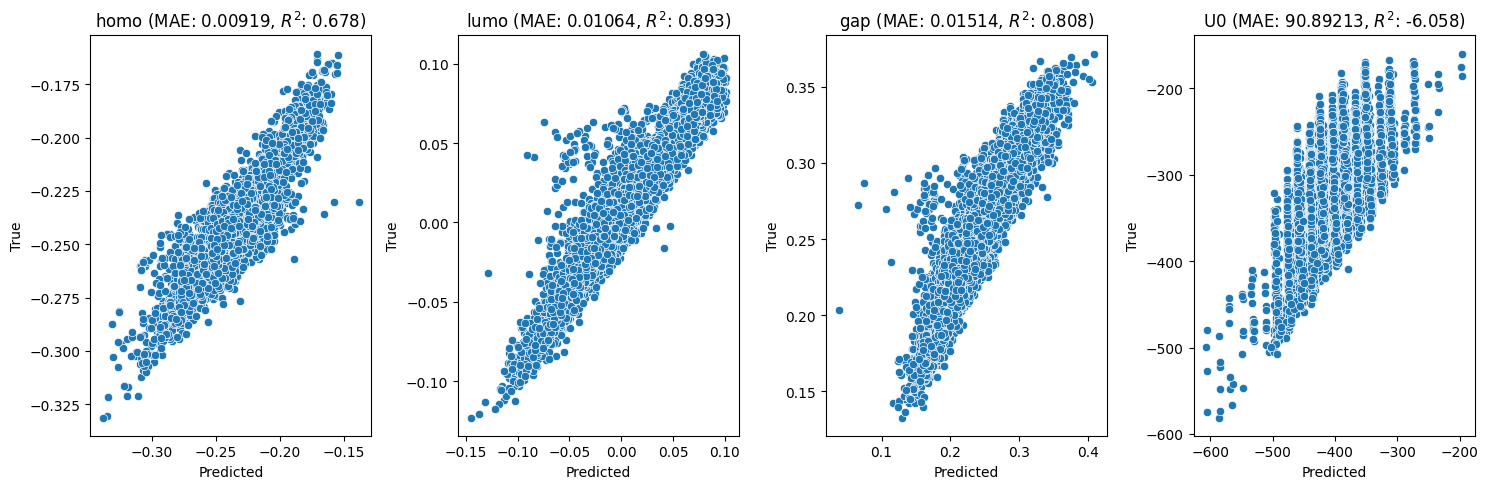

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

name_list = ["homo", "lumo", "gap", "U0"]
df_qm9[key]
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
for i in range(4):
    key = name_list[i]
    sns.scatterplot(x=df_qm9[key], y=df_qm9_chemprop[key], ax=ax[i])
    ax[i].set_title(
        "{} (MAE: {:.5f}, $R^2$: {:.3f})".format(
            key,
            mae_dict[key],
            r2_dict[key],
        )
    )
    ax[i].set_xlabel("Predicted")
    ax[i].set_ylabel("True")
    # ax[i].set_xlim(-10, 10)
    # ax[i].set_ylim(-10, 10)
    # ax[i].plot([-10, 10], [-10, 10], color="black", linestyle="--")
fig.tight_layout()


In [2]:
(-6.1 + 0.8 + 0.893 + 0.678) / 4


-0.93225

In [3]:
(0.2454 + 0.5554 + 0.3511 + 0.7552) / 4


0.47677499999999995